<a href="https://colab.research.google.com/github/deancochran/SpotifyData/blob/master/CSC_DataSet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load in the 'SpotifyFeatures' Spotify Dataset

Notice: 
Before this dataset can be used, it must be uploaded to the local colab notebook. (To do this... click the folder(file) icon on the right side of the screen, and click upload. Then upload the CSV file , 'SpotifyFeatures.csv' )
If this page is closed the data **MUST** be uploaded again

If the user of this notebook doesn't have access to the dataset, the file can be found at the following URL address
https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db



# Spotify Data Analysis (Time Approximation for Code to Run: 10 min)
By: Dean Cochran



# Goal

> To become an effective data scientist, you need extensive practice modeling and analyzing real world relationships. In this anlysis I hope to highlight how it is possible to form the best dance playlist for any genre. 


# Imports

In [0]:
import sys
import nltk
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
spotify = pd.read_csv("songs.csv", skip_blank_lines=True, error_bad_lines=False)

In [0]:
spotify=spotify.dropna()

Before assuming anything about our data, lets take a look at the dataset

In [0]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

To analyze our data we need to change some of our dimensions to only integers (ie.. 'duration','loudness')... This can be done later though, but for now, look at this weird instance in our data...

In [0]:
spotify['genre'].value_counts(normalize=True)

Comedy              0.041598
Soundtrack          0.041448
Indie               0.041005
Jazz                0.040567
Pop                 0.040331
Electronic          0.040292
Children’s Music    0.040189
Folk                0.039957
Hip-Hop             0.039940
Rock                0.039841
Alternative         0.039802
Classical           0.039772
Rap                 0.039669
World               0.039085
Soul                0.039055
Blues               0.038771
R&B                 0.038638
Anime               0.038397
Reggaeton           0.038359
Ska                 0.038131
Reggae              0.037688
Dance               0.037387
Country             0.037228
Opera               0.035578
Movie               0.033542
Children's Music    0.023216
A Capella           0.000511
Name: genre, dtype: float64

Here are some things you should notice after looking at the data...

*   This gives us a great visual of the full dataset could look like.
*   There's a lot of information that I can't interpret
*   What do all these features mean



To address all of these initial preceptions, lets first address what all of our feature values mean
*   genre:  a category of artistic composition
*   artist_name:  the name of the artist
*   track_name: the name of the song
*   track_id: the Spofity Id of the song (every song has a unique id)
*   popularity: the spotify's rating of popularity (range:[1,100])
*   acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
*   danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
*   duration_ms: the length of the song measure in milli-seconds
*   Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
*   instrumentalness: Predicts whether a track contains no vocals.
*   key: the key the song is played in
*   liveness: Detects the presence of an audience in the recording. 
*   Loudness: 	The overall loudness of a track in decibels (dB). 
*   mode: wether the song is played in a minor or major chord
*   speechiness: Speechiness detects the presence of spoken words in a track. 
*   tempo: the pace at which the song is played at
*   time signature: the signature the pace of the song is played at
*   valence: 	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 













# Lets Explore the Data
I want to know what parts of this data are missing, and what parts of this data I need to manipulate inorder to verify that the data is 'clean'

To do this I wrote a helper function which will parse through my data and 'explore' for me....

In [0]:
# helper function to investigate issues with dataset
def explore(dataset):
  woDup = dataset.drop_duplicates(keep = 'first', inplace = False)
  print("There are", len(dataset) - len(woDup), "duplicate rows in this dataset.")
  print("")

  ## feature names ?  
  stats = dataset.count(level=None)
  names = stats.index
  print("There are", len(list(names)), "columns in the dataset.")
  print("")

  ## missing data ?
  total = stats[0]
  missing  = {"Column Name":[],"% Missing":[]}
  for i in range(1,len(names)):
    missNum = total - stats[i]
    p = missNum / total
    missing['% Missing'].append(p * 100)
    missing['Column Name'].append(names[i])
  missing = pd.DataFrame(data=missing)
  tops = missing.sort_values(by=['% Missing'], ascending = False)
  print(tops)
  print("")
  print("Consider scaling data for modeling.")
  return 

Let's let the computer do the work now

In [0]:
explore(spotify)

There are 0 duplicate rows in this dataset.

There are 18 columns in the dataset.

         Column Name  % Missing
0        artist_name        0.0
9                key        0.0
15    time_signature        0.0
14             tempo        0.0
13       speechiness        0.0
12              mode        0.0
11          loudness        0.0
10          liveness        0.0
8   instrumentalness        0.0
1         track_name        0.0
7             energy        0.0
6        duration_ms        0.0
5       danceability        0.0
4       acousticness        0.0
3         popularity        0.0
2           track_id        0.0
16           valence        0.0

Consider scaling data for modeling.


# ALRIGHT!
Well I guess I picked a very well organized piece of data....

While this is great, I will still need to manipulate the columns to make the data for computer friendly. There seems to be too much information in the wrong format

# What else can we find out about the data

Let's make some visuals...

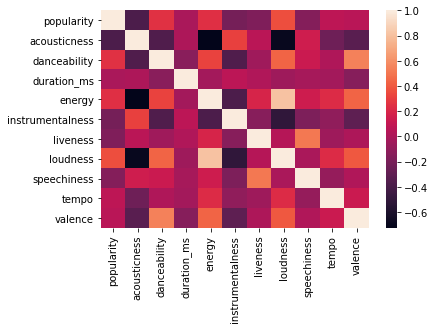

In [0]:
sns.heatmap(spotify.corr())

Here we can see the correlation between all the features in our data!

From first glance I can tell that, Energy and Loudness seem to have a linear relationship between eachother

In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data.

Lets make histograms to observe how are data is shown in our dataframe

HISTOGRAM of popularity


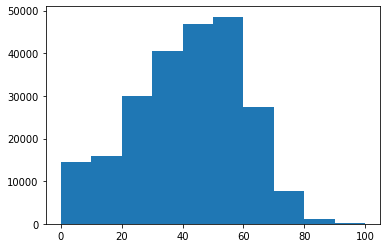

In [0]:
  plt.hist(spotify['popularity'])
  print('HISTOGRAM of popularity')

HISTOGRAM of acousticness


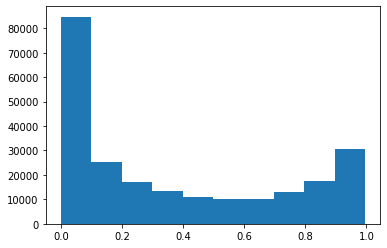

In [0]:
  plt.hist(spotify['acousticness'])
  print('HISTOGRAM of acousticness')

HISTOGRAM of danceability


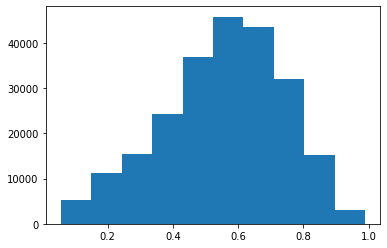

In [0]:
  plt.hist(spotify['danceability'])
  print('HISTOGRAM of danceability')

HISTOGRAM of energy


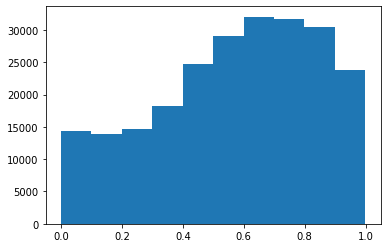

In [0]:
  plt.hist(spotify['energy'])
  print('HISTOGRAM of energy')

HISTOGRAM of instrumentalness


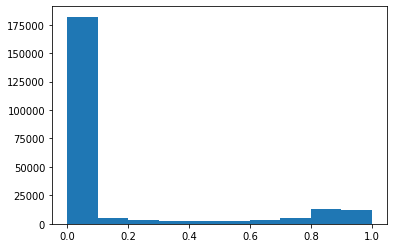

In [0]:
  plt.hist(spotify['instrumentalness'])
  print('HISTOGRAM of instrumentalness')

HISTOGRAM of liveness


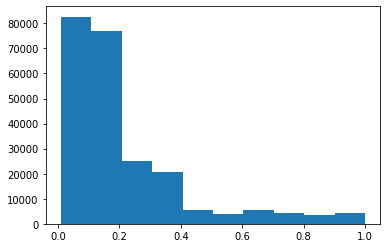

In [0]:
  plt.hist(spotify['liveness'])
  print('HISTOGRAM of liveness')

HISTOGRAM of speechiness


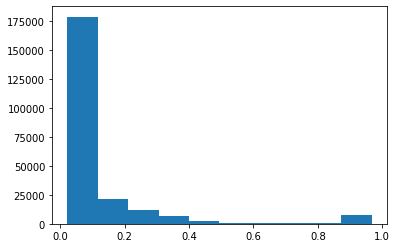

In [0]:
  plt.hist(spotify['speechiness'])
  print('HISTOGRAM of speechiness')

HISTOGRAM of tempo


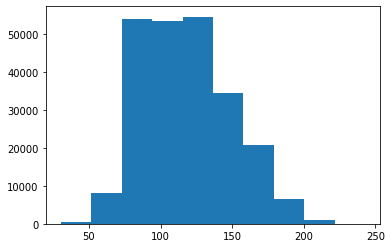

In [0]:
  plt.hist(spotify['tempo'])
  print('HISTOGRAM of tempo')

HISTOGRAM of valence


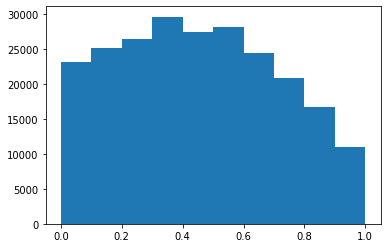

In [0]:
  plt.hist(spotify['valence'])
  print('HISTOGRAM of valence')

**Let's add a dimensional column to our data frame**
Popularity seems to be very opinionated, to be popular a song (at least in my opinion) needs to be trendy. So lets add that, a class called 'trendy'.

In [0]:
category = pd.cut(spotify['popularity'],bins=[-1,25,50,75,100],labels=['1','2','3','4'])
spotify.insert(5,'trendy',category)

In [0]:
spotify.head()

,genre,artist_name,track_name,track_id,popularity,trendy,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,1,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,1,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,1,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,1,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [0]:
spotify['trendy'].value_counts(normalize=True)

2    0.460827
3    0.329341
1    0.197130
4    0.012702
Name: trendy, dtype: float64

HISTOGRAM of trendy


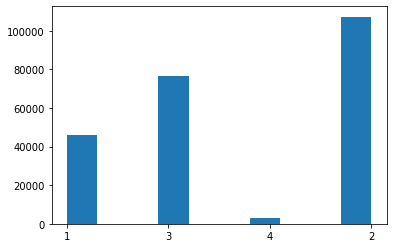

In [0]:
  plt.hist(spotify['trendy'])
  print('HISTOGRAM of trendy')

# What is the problem then... 
Well, we haven't shown that we can create the best dance playlist for any genre. 

The first thing you should notice at this point in the analysis is that, 'hey how are you going to make a dance playlist for genres that no one dances to.'

This brings us to our first decision amoungst the data set. To create the best playlist for each genre, we will need to create new dataframes for each particular genre we want a playlist of...

In [0]:
#find an array of each genre in the data set
spotify.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

Notice that there are a lot a genres, lets make a new array of only the genres we want to make a dance playlist from

In [0]:
genres=['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World']


Cool now lets make a dataframe for each specific genre

In [0]:
#first we need to create an identifier series of true and false elements to create a new df for each genre
Movieid=spotify['genre']=='Movie'
RBid=spotify['genre']=='R&B'
ACapellaid=spotify['genre']=='A Capella'
Alternativeid=spotify['genre']=='Alternative'
Countryid=spotify['genre']=='Country'
Danceid=spotify['genre']=='Dance'
Electronicid=spotify['genre']=='Electronic'
Animeid=spotify['genre']=='Anime'
Folkid=spotify['genre']=='Folk'
Bluesid=spotify['genre']=='Blues'
Operaid=spotify['genre']=='Opera'
HipHopid=spotify['genre']=='Hip-Hop'
Rapid=spotify['genre']=='Rap'
Indieid=spotify['genre']=='Indie'
Classicalid=spotify['genre']=='Classical'
Popid=spotify['genre']=='Pop'
Reggaeid=spotify['genre']=='Reggae'
Reggaetonid=spotify['genre']=='Reggaeton'
Jazzid=spotify['genre']=='Jazz'
Rockid=spotify['genre']=='Rock'
Skaid=spotify['genre']=='Ska'
Comedyid=spotify['genre']=='Comedy'
Soulid=spotify['genre']=='Soul'
Soundtrackid=spotify['genre']=='Soundtrack'
Worldid=spotify['genre']=='World'

In [0]:
# now we can create a playlist for each genre that holds all the songs that fit the genre
Movie=spotify[Movieid]
RB=spotify[RBid]
ACapella=spotify[ACapellaid]
Alternative=spotify[Alternativeid]
Country=spotify[Countryid]
Dance=spotify[Danceid]
Electronic=spotify[Electronicid]
Anime=spotify[Animeid]
Folk=spotify[Folkid]
Blues=spotify[Bluesid]
Opera=spotify[Operaid]
HipHop=spotify[HipHopid]
Rap=spotify[Rapid]
Indie=spotify[Indieid]
Classical=spotify[Classicalid]
Pop=spotify[Popid]
Reggae=spotify[Reggaeid]
Reggaeton=spotify[Reggaetonid]
Jazz=spotify[Jazzid]
Rock=spotify[Rockid]
Ska=spotify[Skaid]
Comedy=spotify[Comedyid]
Soul=spotify[Soulid]
Soundtrack=spotify[Soundtrackid]
World=spotify[Worldid]


In [0]:
playlists=[Movie, RB, ACapella, Alternative, Country, Dance,
       Electronic, Anime, Folk, Blues, Opera, HipHop, Rap, Indie,
       Classical, Pop, Reggae, Reggaeton, Jazz, Rock, Ska,
       Comedy, Soul, Soundtrack, World]

Cool, what we just did, if it was hard to tell, was split all of our songs in to categorical playlists based off there genre.

Each genre name is now a dataframe holding any song in the spotify dataset with the corresponding genre.

In [0]:
#For Example
World.head()
# noticce that World is a data frame on only songs whose genre is labeled as world!

,genre,artist_name,track_name,track_id,popularity,trendy,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
207149,World,Cory Asbury,Reckless Love,0rH0mprtecH3grD9HFM5AD,76,4,0.02910,0.572,333386,0.685,0.000000,F#,0.0963,-7.290,Major,0.0356,110.698,4/4,0.232
207150,World,Elevation Worship,O Come to the Altar (Live),1lEk3U3MzbDeL5MNHkE9JU,72,3,0.00274,0.256,349587,0.564,0.000000,B,0.7430,-6.496,Major,0.0366,139.914,3/4,0.152
207151,World,Hillsong UNITED,Oceans (Where Feet May Fail),5Mw9bXG1dLNhbjofkVS2oR,70,3,0.50800,0.262,536000,0.361,0.002680,D,0.1080,-10.191,Major,0.0333,126.860,4/4,0.056
207152,World,Hillsong UNITED,So Will I (100 Billion X),1ed3wNCecRIp6SugyR0w2J,69,3,0.04620,0.432,411000,0.416,0.000002,A,0.1440,-10.376,Major,0.0296,127.963,4/4,0.177
207153,World,Mosaic MSC,Tremble - Live,35GACeX8Zl55jp29xFbvvo,70,3,0.22100,0.329,309093,0.682,0.000000,C,0.1900,-6.374,Major,0.0526,148.029,4/4,0.162


# Let's observe each of our playlists to see how we can make them better...


['Movie']


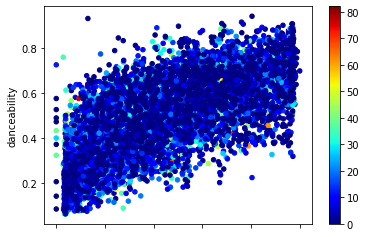

['R&B']


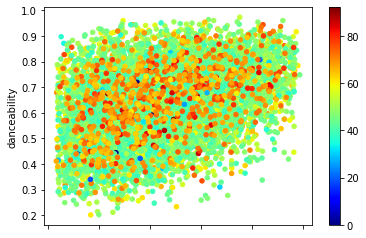

['A Capella']


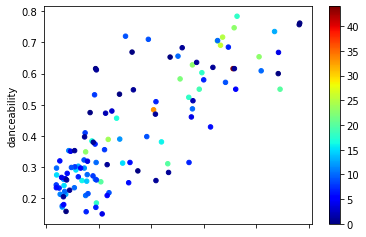

['Alternative']


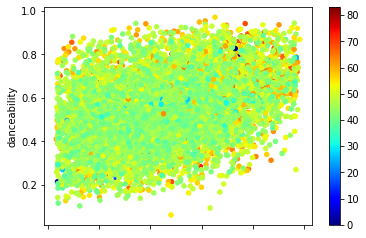

['Country']


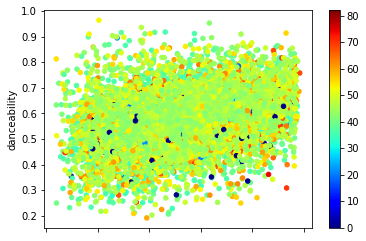

['Dance']


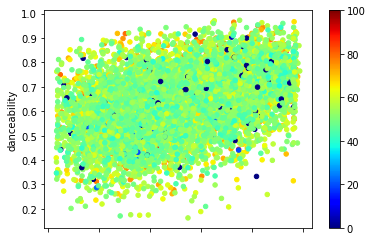

['Electronic']


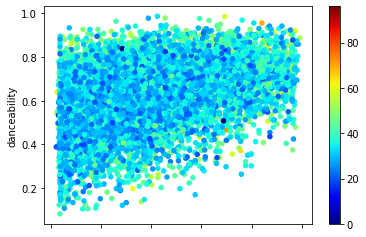

['Anime']


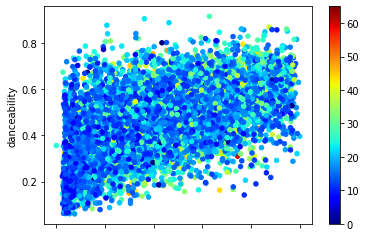

['Folk']


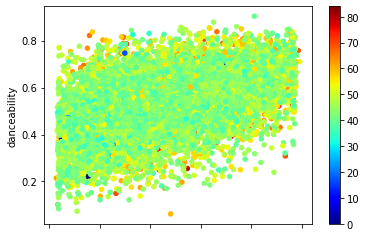

['Blues']


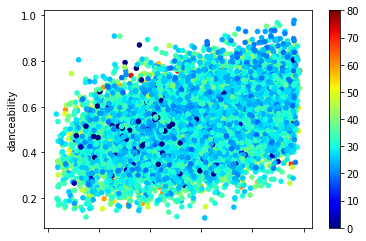

['Opera']


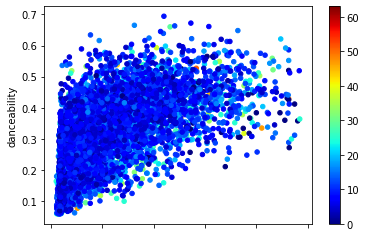

['Hip-Hop']


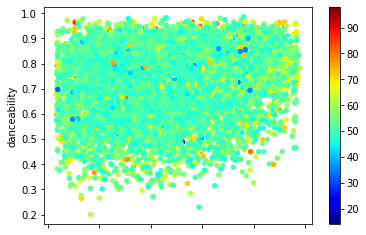

['Rap']


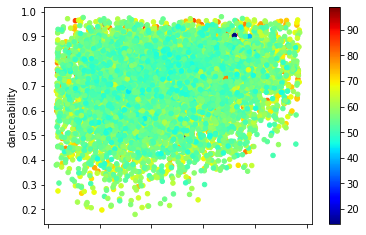

['Indie']


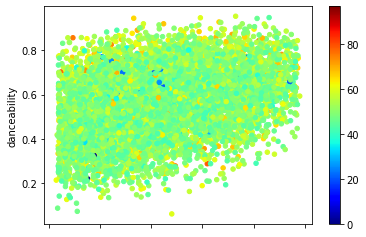

['Classical']


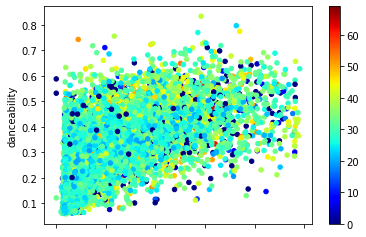

['Pop']


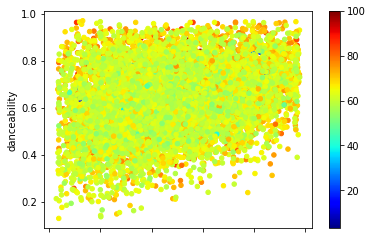

['Reggae']


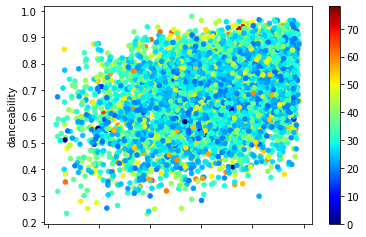

['Reggaeton']


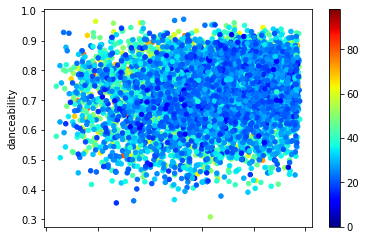

['Jazz']


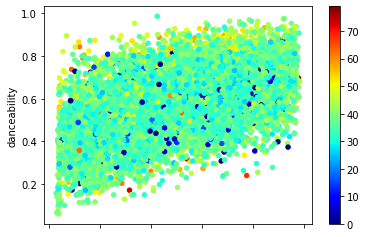

['Rock']


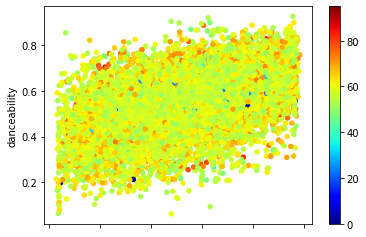

['Ska']


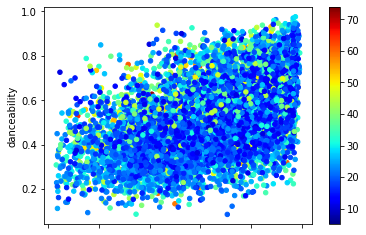

['Comedy']


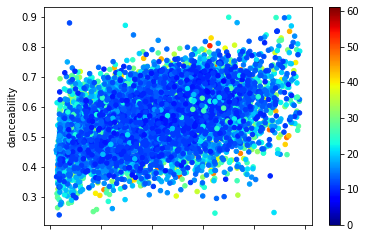

['Soul']


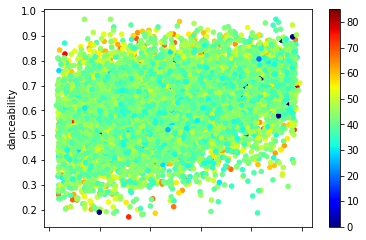

['Soundtrack']


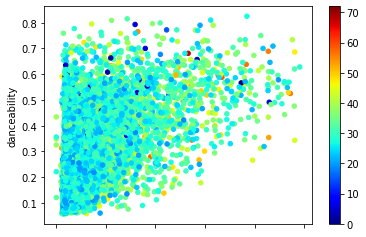

['World']


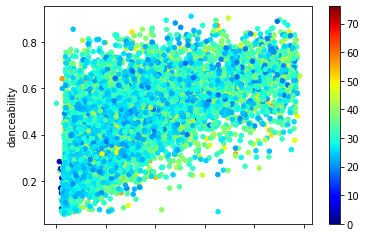

In [0]:
for df in playlists:
  print(df.genre.unique())
  df.plot(kind='scatter',x='valence',y='danceability', c=df['popularity'].astype('float'), colormap='jet')
  #df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
  plt.show()

# So what does this tell us...

Obvisouly the goal is to create the 'best dance playlist' for each genre

Then what does it mean to be the best dance playlist...
Well the way I see it is that the playlist must have songs whose danceability rating is above .75... 

Additionally, I only want popular songs in my playlist, I want others to consider my playlist as 'the best.' This means I will also only want songs who have a 'trendy' value (the variable we added earlier) of at least 3. We don't want unpopular songs in our playlist.

Well it looks like since all of the songs for each genre are now color coded we can claim that the Movie, A Capella, Anime, Electronic, Blues, Opera, Classical, Reggae, Reggaeton, Jazz, Ska, Comedy, Soundtrack, and World columns all have very danceable and energetic songs, but many of those songs are not trendy. 

Some songs in fact aren't very danceable at all, becuase pf the lack of consistent danceablility and popularity of the songs in our playlists, we will need to adjust our playlists...



Movie
No popular and danceable songs in this genre

R&B


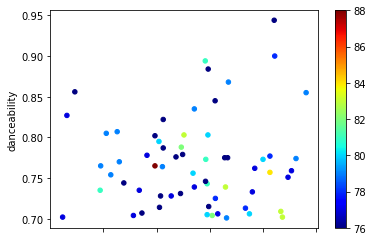

       genre        artist_name  ... time_signature valence
147      R&B       Jason Derulo  ...            4/4   0.620
152264   R&B         City Girls  ...            4/4   0.493
152269   R&B          YK Osiris  ...            5/4   0.422
152273   R&B  Rex Orange County  ...            4/4   0.537
152276   R&B     Camila Cabello  ...            4/4   0.394
...      ...                ...  ...            ...     ...
152670   R&B         Little Mix  ...            4/4   0.826
152755   R&B      Fifth Harmony  ...            4/4   0.594
152801   R&B       Jason Derulo  ...            4/4   0.656
152804   R&B           Rita Ora  ...            4/4   0.415
152810   R&B           Rita Ora  ...            4/4   0.962

[63 rows x 19 columns]
A Capella
No popular and danceable songs in this genre

Alternative


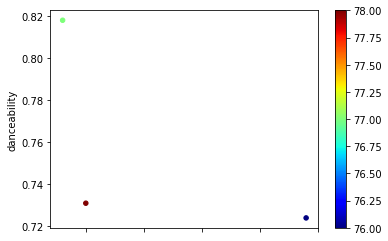

            genre   artist_name  ... time_signature valence
677   Alternative   Smash Mouth  ...            4/4   0.780
679   Alternative      Gorillaz  ...            4/4   0.772
1511  Alternative  ChocQuibTown  ...            4/4   0.856

[3 rows x 19 columns]
Country


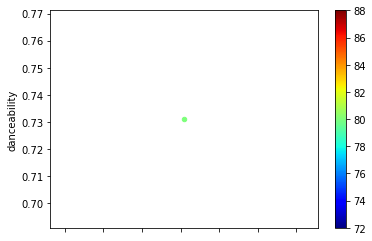

          genre artist_name  ... time_signature valence
212279  Country    Sam Hunt  ...            4/4   0.631

[1 rows x 19 columns]
Dance


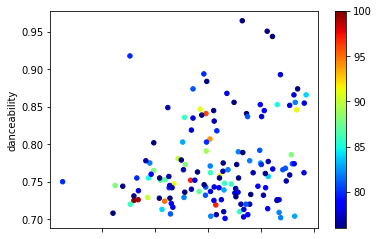

       genre    artist_name  ... time_signature valence
9026   Dance  Ariana Grande  ...            4/4   0.335
9027   Dance  Ariana Grande  ...            4/4   0.319
9028   Dance         Halsey  ...            4/4   0.533
9030   Dance  Ariana Grande  ...            4/4   0.470
9031   Dance  Ariana Grande  ...            4/4   0.435
...      ...            ...  ...            ...     ...
14629  Dance   Clean Bandit  ...            4/4   0.330
14664  Dance      Sean Paul  ...            4/4   0.463
14727  Dance     Jonas Blue  ...            4/4   0.704
14828  Dance         Juanes  ...            4/4   0.961
15090  Dance      Jax Jones  ...            4/4   0.703

[146 rows x 19 columns]
Electronic


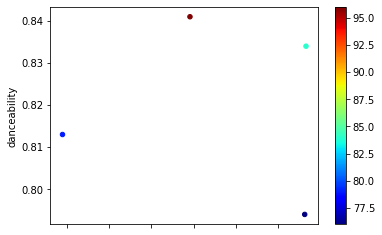

            genre artist_name  ... time_signature valence
22169  Electronic    DJ Snake  ...            4/4   0.591
22175  Electronic   Daft Punk  ...            4/4   0.862
22184  Electronic  Tropkillaz  ...            4/4   0.865
22217  Electronic     Gaullin  ...            4/4   0.290

[4 rows x 19 columns]
Anime
No popular and danceable songs in this genre

Folk


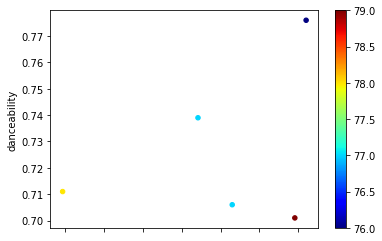

      genre          artist_name  ... time_signature valence
40509  Folk        Tracy Chapman  ...            4/4   0.194
40527  Folk           Billy Joel  ...            4/4   0.791
40538  Folk           Paul Simon  ...            4/4   0.820
40570  Folk   Corinne Bailey Rae  ...            4/4   0.542
40571  Folk  Natasha Bedingfield  ...            4/4   0.630

[5 rows x 19 columns]
Blues
No popular and danceable songs in this genre

Opera
No popular and danceable songs in this genre

Hip-Hop


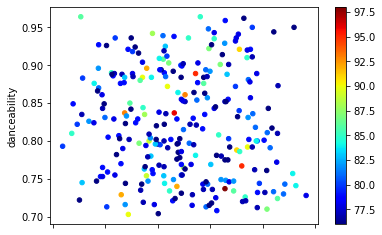

         genre      artist_name  ... time_signature valence
66607  Hip-Hop          J. Cole  ...            4/4   0.463
66608  Hip-Hop        Meek Mill  ...            4/4   0.544
66609  Hip-Hop        21 Savage  ...            4/4   0.274
66610  Hip-Hop     Rich The Kid  ...            4/4   0.380
66611  Hip-Hop        Sheck Wes  ...            4/4   0.261
...        ...              ...  ...            ...     ...
88398  Hip-Hop              NSG  ...            4/4   0.762
89144  Hip-Hop            Cadet  ...            4/4   0.760
89288  Hip-Hop         Kontra K  ...            4/4   0.605
90761  Hip-Hop  Heuss L'enfoiré  ...            4/4   0.817
92632  Hip-Hop            Booba  ...            4/4   0.255

[268 rows x 19 columns]
Rap


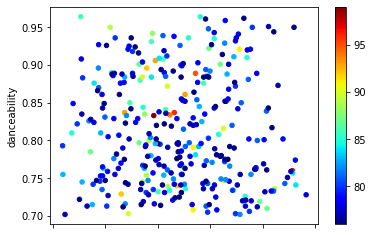

       genre   artist_name  ... time_signature valence
86951    Rap   Post Malone  ...            4/4   0.385
86952    Rap       J. Cole  ...            4/4   0.463
86953    Rap   Post Malone  ...            4/4   0.913
86954    Rap  Travis Scott  ...            4/4   0.446
86955    Rap     Meek Mill  ...            4/4   0.544
...      ...           ...  ...            ...     ...
116196   Rap     Sean Paul  ...            4/4   0.463
117035   Rap     Jax Jones  ...            4/4   0.703
117087   Rap     Jax Jones  ...            4/4   0.693
118009   Rap     Jax Jones  ...            4/4   0.638
121049   Rap   Alle Farben  ...            4/4   0.685

[330 rows x 19 columns]
Indie


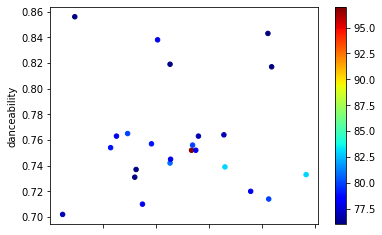

       genre        artist_name  ... time_signature valence
92824  Indie             Halsey  ...            4/4  0.5330
92829  Indie  Rex Orange County  ...            4/4  0.5370
92832  Indie         Bryce Vine  ...            4/4  0.2500
92835  Indie        James Blake  ...            4/4  0.2280
92837  Indie             Halsey  ...            4/4  0.4520
92838  Indie  Foster The People  ...            4/4  0.9650
92844  Indie             G-Eazy  ...            4/4  0.8210
92852  Indie      gianni & kyle  ...            4/4  0.4520
92853  Indie             G-Eazy  ...            4/4  0.4050
92855  Indie           Two Feet  ...            4/4  0.2920
92858  Indie            Ruth B.  ...            4/4  0.3480
92860  Indie               MGMT  ...            3/4  0.5590
92864  Indie             G-Eazy  ...            4/4  0.8350
92866  Indie  The White Stripes  ...            4/4  0.3240
92871  Indie             G-Eazy  ...            4/4  0.3820
92872  Indie             Halsey  ...    

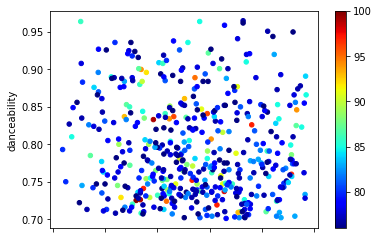

       genre    artist_name  ... time_signature valence
107802   Pop  Ariana Grande  ...            4/4   0.335
107803   Pop    Post Malone  ...            4/4   0.385
107804   Pop  Ariana Grande  ...            4/4   0.319
107805   Pop        J. Cole  ...            4/4   0.463
107806   Pop    Post Malone  ...            4/4   0.913
...      ...            ...  ...            ...     ...
113675   Pop      Jax Jones  ...            4/4   0.638
113700   Pop         Anitta  ...            4/4   0.295
150428   Pop         Anitta  ...            4/4   0.967
150726   Pop   Alvaro Soler  ...            4/4   0.742
151943   Pop           Alok  ...            4/4   0.496

[470 rows x 19 columns]
Reggae


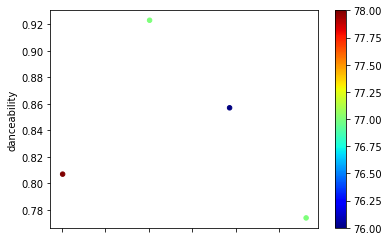

         genre               artist_name  ... time_signature valence
122398  Reggae  Bob Marley & The Wailers  ...            4/4   0.651
122399  Reggae                      UB40  ...            4/4   0.843
122401  Reggae  Bob Marley & The Wailers  ...            4/4   0.751
122407  Reggae                    MAGIC!  ...            4/4   0.931

[4 rows x 19 columns]
Reggaeton


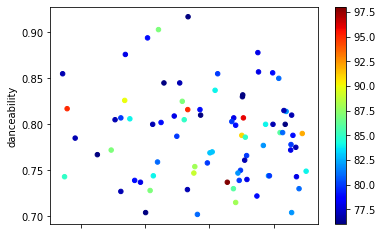

            genre   artist_name  ... time_signature valence
138915  Reggaeton     Bad Bunny  ...            4/4   0.158
138916  Reggaeton      Anuel Aa  ...            4/4   0.706
138917  Reggaeton         Ozuna  ...            4/4   0.533
138918  Reggaeton  Daddy Yankee  ...            4/4   0.656
138919  Reggaeton     Bad Bunny  ...            4/4   0.337
...           ...           ...  ...            ...     ...
139089  Reggaeton         Yannc  ...            4/4   0.682
139109  Reggaeton   Danny Ocean  ...            4/4   0.532
139113  Reggaeton   Danny Ocean  ...            4/4   0.450
139123  Reggaeton  Tommy Boysen  ...            4/4   0.491
139124  Reggaeton   Paloma Mami  ...            4/4   0.339

[83 rows x 19 columns]
Jazz
No popular and danceable songs in this genre

Rock


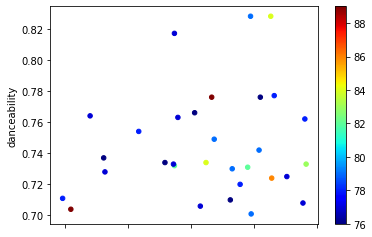

       genre          artist_name  ... time_signature valence
166061  Rock      Imagine Dragons  ...            4/4   0.220
166063  Rock      Imagine Dragons  ...            4/4   0.666
166071  Rock    The White Stripes  ...            4/4   0.324
166072  Rock    Twenty One Pilots  ...            4/4   0.648
166078  Rock        Fleetwood Mac  ...            4/4   0.789
166080  Rock    Foster The People  ...            4/4   0.965
166084  Rock    Twenty One Pilots  ...            4/4   0.548
166089  Rock          Smash Mouth  ...            4/4   0.780
166094  Rock           John Mayer  ...            4/4   0.853
166104  Rock           Billy Joel  ...            4/4   0.791
166150  Rock                 MGMT  ...            3/4   0.559
166158  Rock    Twenty One Pilots  ...            4/4   0.674
166189  Rock        Fleetwood Mac  ...            4/4   0.731
166192  Rock                AC/DC  ...            4/4   0.435
166207  Rock    Twenty One Pilots  ...            4/4   0.518
166221  

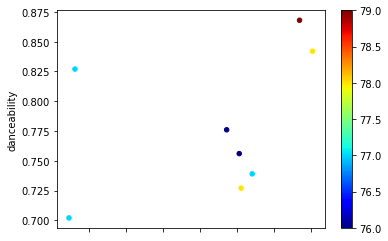

       genre         artist_name  ... time_signature valence
191943  Soul             Estelle  ...            4/4  0.5120
191944  Soul               GASHI  ...            4/4  0.7050
191946  Soul            Al Green  ...            4/4  0.5070
191955  Soul  Corinne Bailey Rae  ...            4/4  0.5420
191961  Soul             Solange  ...            4/4  0.0631
191967  Soul          Ari Lennox  ...            4/4  0.0470
191976  Soul         Frank Ocean  ...            4/4  0.4730
191992  Soul         Blackstreet  ...            4/4  0.6700

[8 rows x 19 columns]
Soundtrack
No popular and danceable songs in this genre

World
No popular and danceable songs in this genre



In [0]:
# filtering data on basis of both filters 
count=0
for i in playlists:
  #Removing all songs in the playlists whose danceability level is below .75
  filter1 = i["danceability"]>.70
  #Removing all songs in the playlists whose popularity is below level 50
  filter2 = i["trendy"].astype(float)==4
  i=i.where(filter1 & filter2)
  #Here we will remove all the songs that were filtered out
  i=i.dropna()
  print(genres[count])
  if len(i.genre)<1:
    print('No popular and danceable songs in this genre')
    print()
  else:
    i.plot(kind='scatter',x='valence',y='danceability', c=i['popularity'].astype('float'), colormap='jet')
    #df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
    plt.show() 
    print(i)

  count=count+1


# Okay so what does this tell us


To create the 'best dance playlist' for each genre consists of songs whose 'danceability' rating is above .7 and songs whose 'trendy' value (the variable we added earlier) of 4.

Genres that don't have any songs plotted on the above images do not have any songs in our data set that have a danceability rating of .7 or higher and a trendy value of 4.

In other words, every point on the above plots represents a song that deserves to be in the 'best [insert genre name here] playlist'.



# In Conclusion,

We can create the 'best dance' playlist for any genre. To create the best dance playlist for genre, we simpily identify the values of every point in specific genre's plot and add it to a list of songs specificed for its unique genre.